In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import seaborn as sn
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, matthews_corrcoef)
plt.rc("font", size=14)

test_set = pd.read_csv("not100.csv")
train_set = pd.read_csv("uk_fin.csv",encoding= 'unicode_escape')

col_names = ['danceability', 'energy','loudness',
       'acousticness', 'instrumentalness', 'tempo']
frames1 = [test_set, train_set]
data = pd.concat(frames1)
#data = data.dropna()
X = data[col_names] 
y = data['class'] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
con_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(con_matrix, annot=True)

In [2]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7594202898550725
Recall: 0.8009049773755657
Precision: 0.8194444444444444


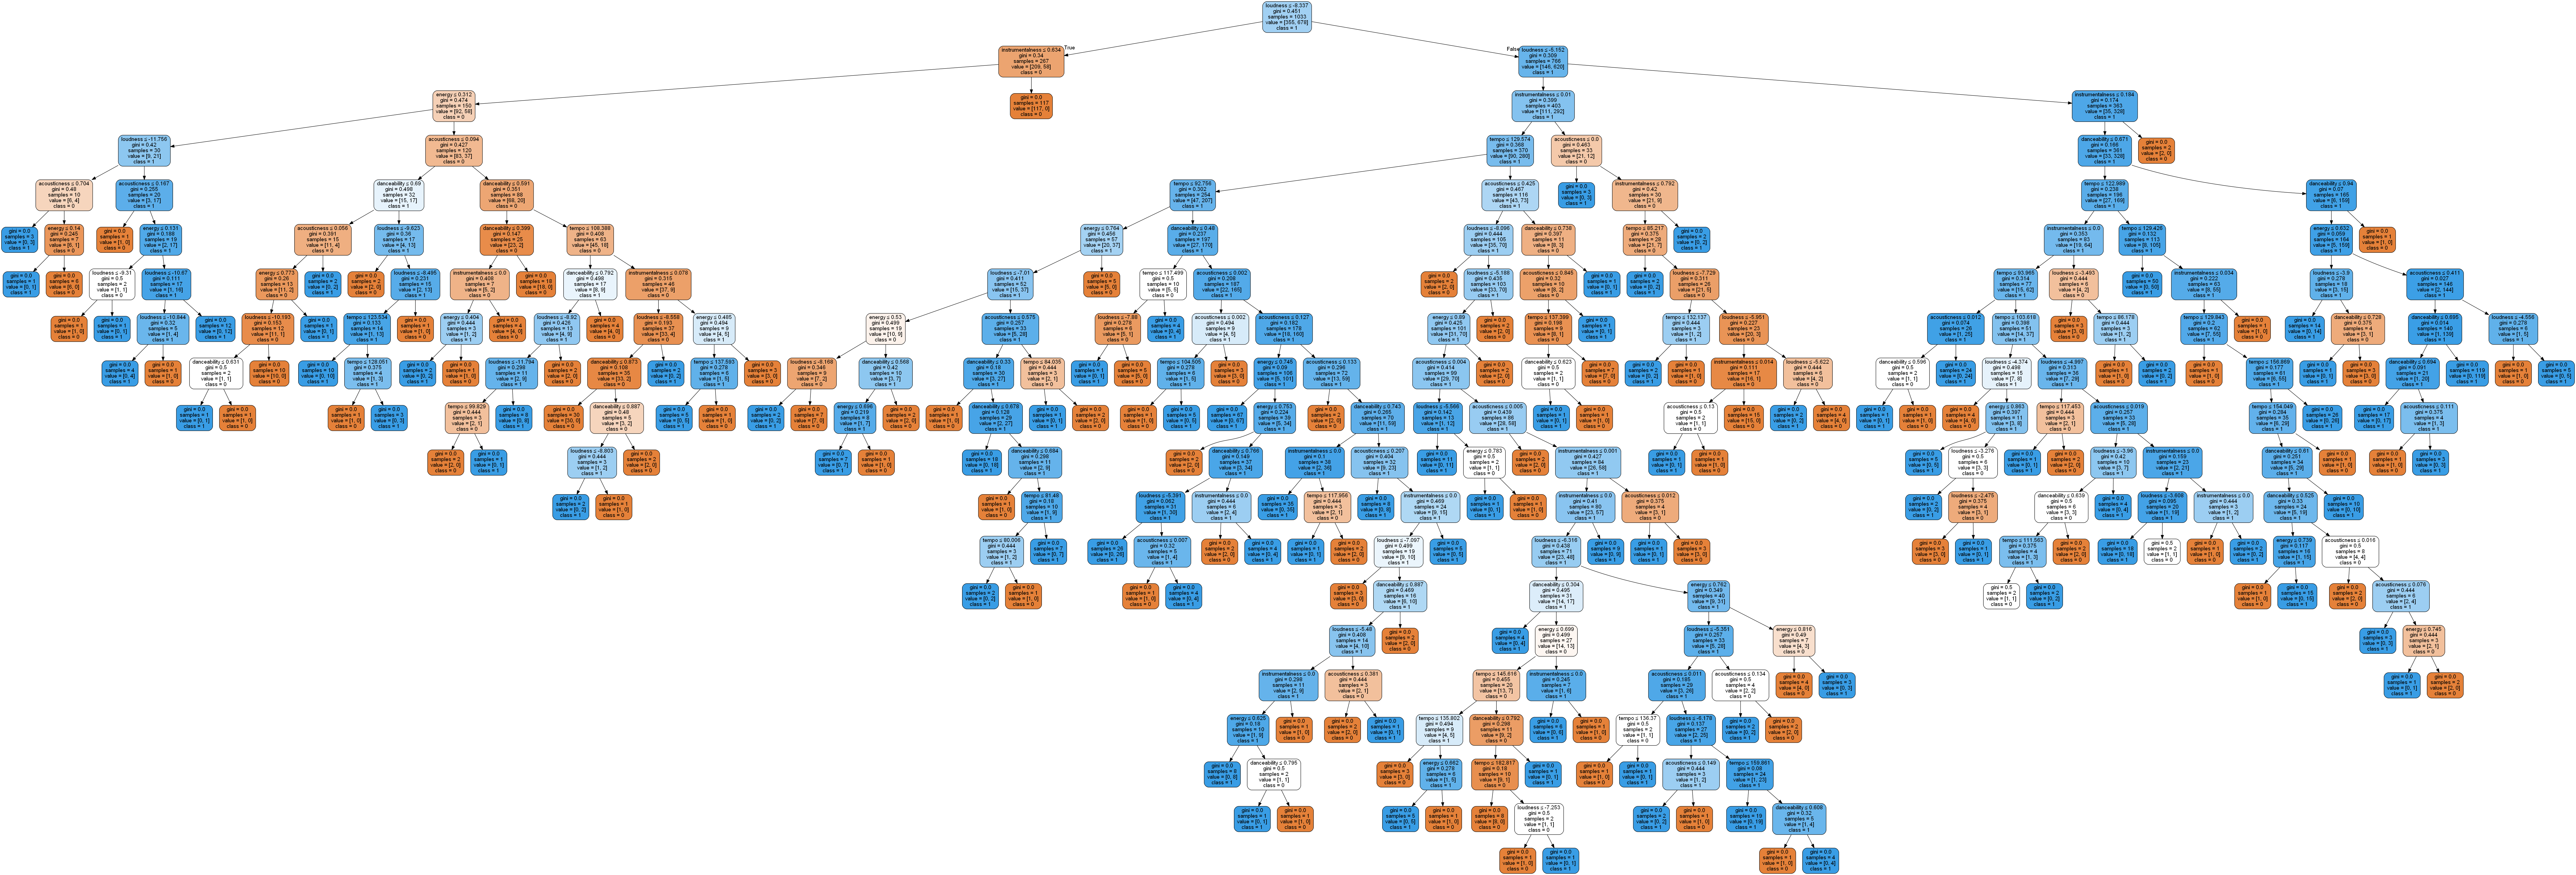

In [3]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thetree.png')
Image(graph.create_png())

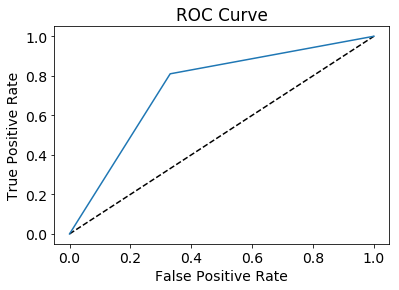

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       124
           1       0.81      0.81      0.81       221

   micro avg       0.76      0.76      0.76       345
   macro avg       0.74      0.74      0.74       345
weighted avg       0.76      0.76      0.76       345

Accuracy Score: 0.7594202898550725
AUROC Score: 0.7396547949204497
MCC: 0.47847224532635535

 Clasification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67       124
           1       0.81      0.81      0.81       221

   micro avg       0.76      0.76      0.76       345
   macro avg       0.74      0.74      0.74       345
weighted avg       0.76      0.76      0.76       345


 Confusion Matrix:
 [[ 83  41]
 [ 42 179]]


In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# ROC CURVE
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
y_pred_prob = clf.predict_proba(X_test)[:,1]
print('AUROC Score:',roc_auc_score(y_test, y_pred_prob))
print('MCC:', matthews_corrcoef(y_test, y_pred))
print('\n Clasification Report:\n', classification_report(y_test, y_pred))
cm =  confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:\n', cm)

In [27]:
df2 = pd.read_csv("mylist_fin.csv")
col_names = ['danceability', 'energy', 'loudness',
     'acousticness', 'instrumentalness', 'tempo']
mydf = df2[col_names]  

y2_pred=clf.predict(mydf)

print (df2)
print (y2_pred)

                                           track_name               artist  \
0   Running Up That Hill - Recorded at Spotify Stu...        First Aid Kit   
1                                      Mountain Sound  Of Monsters and Men   
2                                Breathing Underwater               Metric   
3                  Unsteady - Erich Lee Gravity Remix        X Ambassadors   
4                               Make You Feel My Love     Sleeping At Last   
5   Holding Out for a Hero - From the Trailer for ...  Nothing But Thieves   
6                                            Moondust         Jaymes Young   
7                                          All I Want             Kodaline   
8                                               Woman       Mumford & Sons   
9                                    Hem of Her Dress        First Aid Kit   
10                                         Half Light              BANNERS   
11                                       Turning Page     Sleepi

In [28]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
plt.show()

Accuracy:  0.7594202898550725
Recall:  0.8099547511312217
Precision:  0.8136363636363636
